Exploration of MLB Batting Statistics for the 2021-2024 Seasons

The goal of this project is to analyze Baseball Reference’s Standard, Advanced, and Value Batting statistics for the 2021–2024 seasons to test two hypotheses about hitters performance. The data was initially downloaded from the website into 12 seprate excel files then saved on my google drive, and shared via a public link. The links will be used to load the 12 dataframes. Once they are loaded I will clean the data and combine the files so I can analyze the data in one data frame. 

The first hypothesis I aim to test is that the prime years, age wise, for hitters is their age 28-32 seasons. I will divide the data into three age groups <28, 28-32, and 32< to explore this hypothesis. 

The second hypothesis examines whether Strike Out% (SO%) correlates with hitting performance. Although strike outs are a negative outcome for hitters, I hypothesize that the an aggressive approach, leading to a higher SO%, also leads to more offensive production. 

I will create multiple visulizations to explore each of the hypotheses.

I will begin by loading the data frames

In [10]:
# Importing pandas so I can load all of the data files. There is a Standard, Advanced and Value file for each of the years 2021-2024

import pandas as pd

# Creating a dictionary for each of the files and their link saved in my google drive

file_urls = {
    "standard24": "https://drive.google.com/uc?export=download&id=16DvGyoXYEHZs3ZsZ_yb2l86eH6LBkg-h",
    "advanced24": "https://drive.google.com/uc?export=download&id=1pyu3JzKJL6AqQOZ0bvy_lHHk5LrZd-9z",
    "value24": "https://drive.google.com/uc?export=download&id=13ckpVpBGpc-cwUOzQwViYJ0I8AgjxPbV",
    "standard23": "https://drive.google.com/uc?export=download&id=1rt_rh3pW0d38luH4E3N9B9fYOg-SvSBr",
    "advanced23": "https://drive.google.com/uc?export=download&id=1zfVCUWORtzNAwpu6sT3sXMhTDoNbIzGC",
    "value23": "https://drive.google.com/uc?export=download&id=1uakaFJecf1J9z3BRh0bGOBoZWr3HEpNX",
    "standard22": "https://drive.google.com/uc?export=download&id=1nZhXrmS1hYDhQOpFWzBn5P7RYbISqusD",
    "advanced22": "https://drive.google.com/uc?export=download&id=1VutcZLTvhs7sYirEW3ubP14AKmU4Av-h",
    "value22": "https://drive.google.com/uc?export=download&id=1QNifBiDX166waC01t5_9vbMN2fZm1GR4",
    "standard21": "https://drive.google.com/uc?export=download&id=1X7mKsO4lqFdFxWdaEBZj4GkNID8d29F4",
    "advanced21": "https://drive.google.com/uc?export=download&id=1fouu-67Mp7D6vdRwTxvnTPP47x-gWjjO",
    "value21": "https://drive.google.com/uc?export=download&id=1vof_urqDcAn0DzHh1ZI7vV_jzvuRytFJ",
}

# Creating a dictionary for the file names and the data frames
# https://www.geeksforgeeks.org/how-to-store-values-in-dictionary-in-python-using-for-loop/

dfs = {}

# Looping over each of the urls to read each of the excel files
# https://realpython.com/iterate-through-dictionary-python/

for file_name, url, in file_urls.items():
    try:
        df=pd.read_excel(url)
        print(df.head())
        dfs[file_name] = df
    except FileNotFoundError:
        print("The file was not found. Check the path.")


   Rk             Player  Age Team  Lg  WAR    G   PA   AB    R  ...  Rbat+  \
0   1      Jarren Duran*   27  BOS  AL  8.7  160  735  671  111  ...  134.0   
1   2     Shohei Ohtani*   29  LAD  NL  9.2  159  731  636  134  ...  190.0   
2   3  Gunnar Henderson*   23  BAL  AL  9.1  159  719  630  118  ...  157.0   
3   4      Marcus Semien   33  TEX  AL  4.1  159  718  650  101  ...  100.0   
4   5         Juan Soto*   25  NYY  AL  7.9  157  713  576  128  ...  179.0   

    TB  GIDP  HBP  SH  SF  IBB     Pos  Awards   PlayerID  
0  330     6    6   1   3    1     *87      AS  duranja01  
1  411     7    6   0   5   10      *D      AS  ohtansh01  
2  333     2    7   0   4    1    *6/D      AS  hendegu01  
3  254     9    3   0   1    2      *4      AS  semiema01  
4  328    10    4   0   4    2  *9/7DH      AS   sotoju01  

[5 rows x 35 columns]
   Rk             Player  Age Team  Lg   PA   rOBA  Rbat+  BAbip    ISO  ...  \
0   1      Jarren Duran*   27  BOS  AL  735  0.373  134.0  0.3

Next, I will clean the data and organize it into four combinded files, one for each year

In [13]:
# Creating a dictionary for each year and its corresponding files

file_groups = {
    2024: ['standard24', 'advanced24', 'value24'],
    2023: ['standard23', 'advanced23', 'value23'],
    2022: ['standard22', 'advanced22', 'value22'],
    2021: ['standard21', 'advanced21', 'value21']
}

# Creating a dictionary for the combined files that will be output at the end of the for loop 

combined_dfs = {}

# Looping through each of the years and their corresponding files to clean the data and combine the files for each year

for year, files in file_groups.items():

    # Assigning each of the files in the library using indexing to its name
    
    standard_file = dfs[files[0]]
    advanced_file = dfs[files[1]]
    value_file = dfs[files[2]]

    # Printing the Shape of each of the files before manipulating them
    # https://www.digitalocean.com/community/tutorials/python-shape-method

    print(standard_file.shape)
    print(advanced_file.shape)
    print(advanced_file.shape)

    # Adding a year column to each of the standard files

    standard_file['Year'] = year

    # Moving the year column from the back of each standard file to the column in front of the Age column in each standard file
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
    # https://www.codecademy.com/resources/docs/pandas/dataframe/pop
    # https://www.geeksforgeeks.org/python-pandas-dataframe-columns/    

    cols = list(standard_file.columns)
    cols.insert(cols.index('Age'), cols.pop(cols.index('Year')))
    standard_file = standard_file[cols]

    # Merging the Standard file with the Advanced file bringing over the columns that are not in the Standard file, joining the data on Team and PlayerID 

    combined = pd.merge(standard_file, advanced_file[['Team', 'BAbip', 'ISO', 'HR%', 'SO%', 'BB%', 'EV', 'HardH%', 'LD%', 'GB%', 'FB%', 'GB/FB', 'Pull%', 
    'Cent%', 'Oppo%', 'WPA', 'cWPA', 'RE24', 'RS%', 'SB%', 'XBT%', 'PlayerID']], how = 'left', on = ['Team', 'PlayerID'])

    # Merging the original Combined file with the Value file bringing over the columns that are not in the Combined file, joining the data on Team and PlayerID
    # https://pandas.pydata.org/docs/user_guide/merging.html
    
    combined = pd.merge(combined, value_file[['Team', 'Rbat', 'Rbaser', 'Rdp', 'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'waaWL%', 
    '162WL%', 'oWAR', 'dWAR', 'oRAR', 'Salary', 'Acquired', 'PlayerID']], how = 'left', on = ['Team', 'PlayerID'])

    # Dropping the index columns at the front of the file
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

    combined = combined.drop(columns=[combined.columns[0], 'Rk'])

    # For the players who played on multiple teams in the same season, they have multiple rows in each of the files
    # These are deliniated by the team column with the players total stats being the first row 
    # I am dropping all of the rows past the first one for each player
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

    combined = combined.drop_duplicates(subset='PlayerID', keep='first')

    # Filtering the data to the players and years who had 250 or more plate appearances to remove the players who did not play a large portion of the year

    combined = combined[combined['PA'] >= 250]

    # Adding each of the years to the combined_dfs dictionary

    combined_dfs[year] = combined

    # Printing the first 5 rows of each of the combined dataframes

    print(combined.head())

(895, 35)
(895, 31)
(895, 31)
              Player  Year  Age Team  Lg  WAR    G   PA   AB    R  ...  WAA  \
0      Jarren Duran*  2024   27  BOS  AL  8.7  160  735  671  111  ...  6.5   
1     Shohei Ohtani*  2024   29  LAD  NL  9.2  159  731  636  134  ...  7.1   
2  Gunnar Henderson*  2024   23  BAL  AL  9.1  159  719  630  118  ...  6.9   
3      Marcus Semien  2024   33  TEX  AL  4.1  159  718  650  101  ...  1.9   
4         Juan Soto*  2024   25  NYY  AL  7.9  157  713  576  128  ...  5.8   

   Rrep   RAR  waaWL%  162WL%  oWAR  dWAR  oRAR      Salary       Acquired  
0  23.0  84.0   0.540   0.540   6.2   2.5  61.0    760000.0             Hs  
1  23.0  93.0   0.545   0.544   9.2  -1.7  93.0  28216944.0    Free Agency  
2  23.0  89.0   0.543   0.542   8.5   1.5  84.0    756200.0  Amateur Draft  
3  23.0  41.0   0.512   0.512   3.1   1.7  31.0  26000000.0    Free Agency  
4  23.0  78.0   0.536   0.535   7.9  -0.5  78.0  31000000.0         Traded  

[5 rows x 71 columns]
(880, 35)


Now, I will merge the four combined finals into a final output

In [18]:
# Creating a list of each of the combined dataframes

files = [combined_dfs[2024],
    combined_dfs[2023],
    combined_dfs[2022],
    combined_dfs[2021]]

# Concatinating each four data fromas into one large final data set
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

final_combined = pd.concat(files, ignore_index=True)

# Printing the shape of the final data set 

print(final_combined.shape)

(1280, 71)


The data has been cleaned and organized into one file. I will now analyze each of the hyoptheses 

I will first look at the distribution of players across every age.

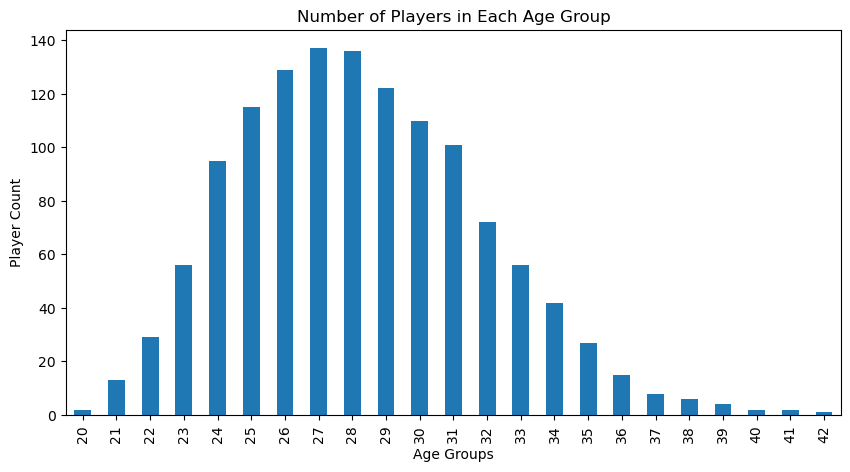

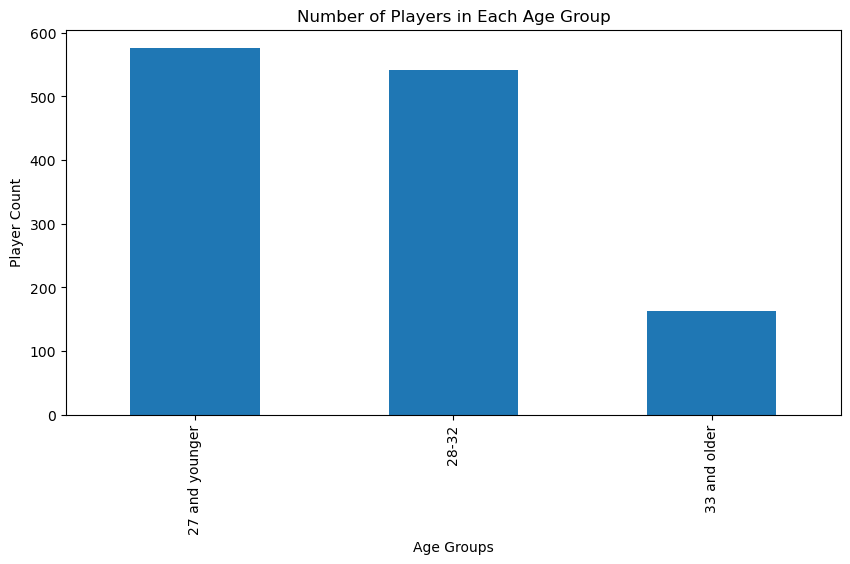

In [22]:
# Importing matplotlib.pyplot and seaborn to assist with all of the graphing and visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of players in my data at each age
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html

age_counts = final_combined['Age'].value_counts().sort_index()

# Creating a bar graph to visualize how many players there are at each age
# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

plt.figure(figsize = (10, 5))
age_counts.plot(kind = 'bar')
plt.title('Number of Players in Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Player Count')
plt.show()

# Creating bins to group the players by age group

bins = [0, 27, 32, 99]

# Creating labels for the age groups

labels = ['27 and younger', '28-32', '33 and older']

# Creating the age groups 
# https://www.statology.org/data-binning-in-python/
# https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/

final_combined['Age_Groups'] = pd.cut(final_combined['Age'], bins=bins, labels=labels)

# Counting the number of players in each age group

age_group_counts = final_combined['Age_Groups'].value_counts()

# Creating a bar graph to visualize how many players there are in each age group

plt.figure(figsize = (10, 5))
age_group_counts.plot(kind = 'bar')
plt.title('Number of Players in Each Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Player Count')
plt.show()

The majority of the players are in the two younger groups. From the visualizations, we can say that by the time players hit age 33, they are usually no longer in the league or they have reduced roles on their team because this data is only looking at players with season where they had at least 250 plate appearances. Another explaination for there being less older players is they may be more prone to injury as they play more seasons and get older. I will keep in mind the lack of older players in my analysis.

I will explore multiple hitting statistics the remainder of the project. Below I have dedicated multiple cells to explain each of those hitting statistics.

Offensive Wins Above Replacement (oWAR)

WAR for position players quantifies the total value a player provides to their team. It is calculated measuring their offensive and fielding production, accounting for positional value and adds a baseline to reflect the gap between a replacement-level player. The stat I will be exploring is oWAR. This accounts for the offensive portion of WAR. This only looks at batting and baserunning value with a positioanl adjustment. It highlights the players offensive value while disregarding their defense. 
A good offense season will result in an oWAR of around 3. An elite season would be a oWAR of 5. An exceptional season would be an oWAR of 8.

Home Run Percentage (HR%)

This is the percentage of plate appearances a player hits a homerun. It isolate a players power and makes it comparable between seasons. Below are some benchmarks for HR%

Below 1%: Little power
1-2% Below Average power
3-5%: League average power
6-8%: Above average power
9%+: Elite power

Baserunnung Runs (Rbaser)

This measures a players contribution while running the bases. It includes stolen bases, advancing bases on hits or outs and avoinding double plays. It rewards players who are smart and aggressive while running the bases. Below are some benchmarks for Rbaser

Below 0: Below average baserunner
0 to 2: Average baserunner
3 to 5: Above average baserunner
6+: Elite baserunner

Runs Above Replacement (RAR)

This is an intermediate step to the WAR calculation. It examines the runs a player contributes compared to a replacment level player. This is a counting stat so playing more contributes to high RARs. Below are some benchmarks for RAR

Below 10: Replacement-level or slightly above
10 to 20: Role player or league-average starter
20 to 40: Good player; adds significant value to the team
40+: All-Star or MVP-caliber season

Adjusted On-Base Plus Slugging Percentage (OPS+)

This statistic is a measure of a players OPS (on-base percentage plus slugging percentage) adjusted for league averages and ball park factors. An OPS+ of 100 is a league average player Below are some benchmarks for OPS+

Below 75: Well below average 
75 to 100: Below average
100: League average
101 to 125: Above average
125 to 150: Well above average
150+: Elite 
200+: Historically great season

Strike Out Percentage (SO%)

Similar to HR%, this stat measures the percentage of plate appearances a player strikes out. It is often used to measure a players plate disciple or ability to make contact with the ball. A strike out is the worst possible outcome for a hitter. Below are some benchmarks for SO%

Below 15%: Below average
15% to 20%: Average
20% to 25%: Above average
25% to 30%: Well above average
30%+: Extremely above average

Pull Percentage (Pull%) Center Percentage (Cent%) Opposite Percentage (Oppo%)

Each of these measure the percentage a hitter hits the ball to each part of the field. For right handed hitters, left field is their pull side. For left handed hitters, right field is their pull side. Typically, hitters with a higher pull% are power hitters and players with higher oppo% are contact hitters. There are not traditional benchmarks for these.

The first hypothesis I will explore is that the prime years, age wise, for hitters is their age 28-32 season. I believe 
that hitters in this age range have gained the experience and ability to perform at their best during those years. 

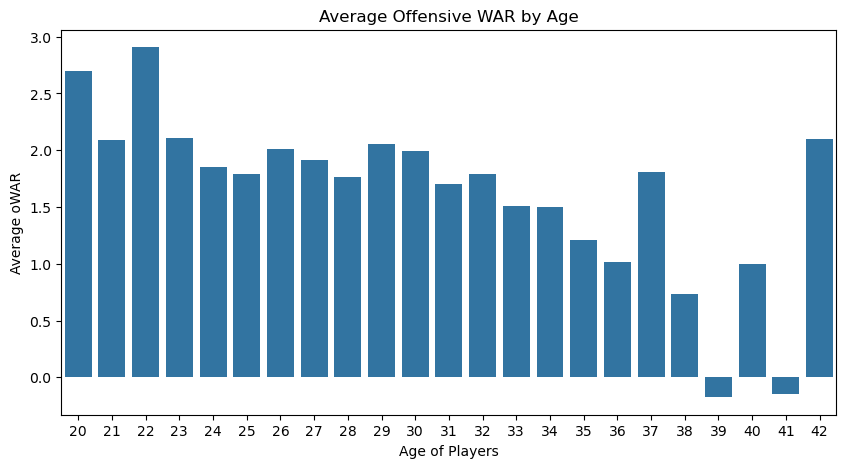

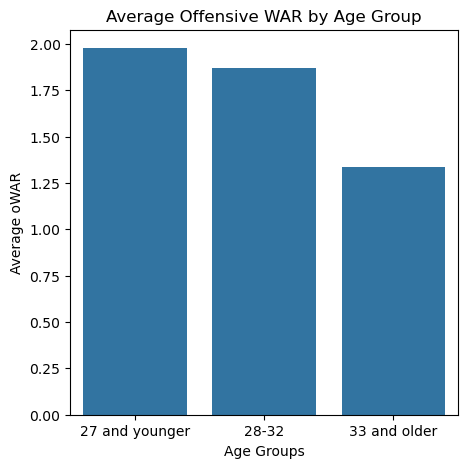

In [34]:
# Calculating the average oWAR and grouping them by age
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

age_owar_avg = final_combined.groupby(['Age'])['oWAR'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average oWAR by age
# https://seaborn.pydata.org/generated/seaborn.barplot.html

plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='oWAR', data=age_owar_avg)
plt.title('Average Offensive WAR by Age')
plt.xlabel('Age of Players')
plt.ylabel('Average oWAR')
plt.show()

# Calculating the average oWAR and grouping them by the age groups created previously

age_owar_avg = final_combined.groupby(['Age_Groups'], observed=True)['oWAR'].mean().reset_index()

# Creating a bar plot with seaborn to show the average oWAR by age group

plt.figure(figsize=(5, 5))
sns.barplot(x='Age_Groups', y='oWAR', data=age_owar_avg)
plt.title('Average Offensive WAR by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average oWAR')
plt.show()

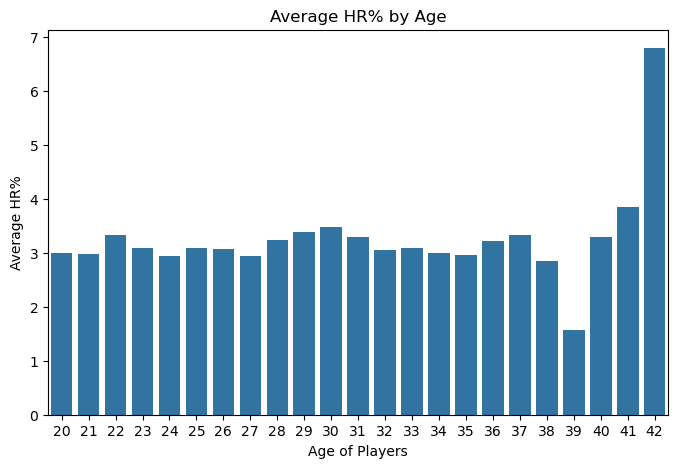

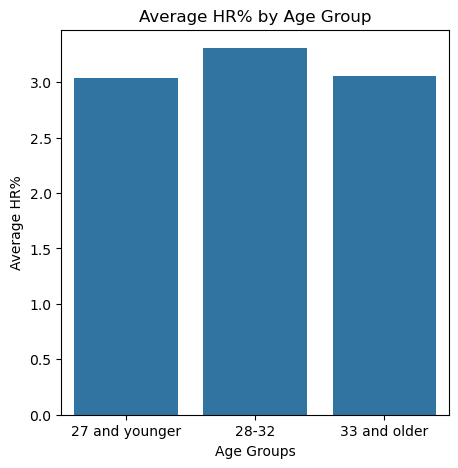

In [36]:
# Calculating the average HR% and grouping them by age

age_HR_avg = final_combined.groupby(['Age'])['HR%'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average HR% by age

plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='HR%', data=age_HR_avg)
plt.title('Average HR% by Age')
plt.xlabel('Age of Players')
plt.ylabel('Average HR%')
plt.show()

# Calculating the average HR% and grouping them by the age groups created previously

age_hr_avg = final_combined.groupby(['Age_Groups'], observed=True)['HR%'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average HR% by age group

plt.figure(figsize=(5, 5))
sns.barplot(x='Age_Groups', y='HR%', data=age_hr_avg)
plt.title('Average HR% by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average HR%')
plt.show()

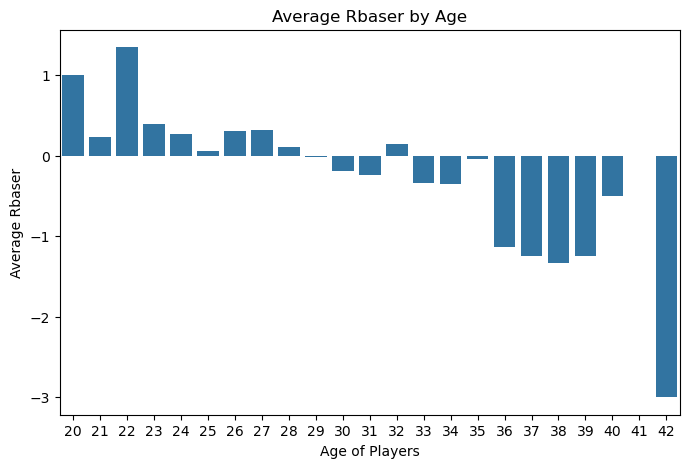

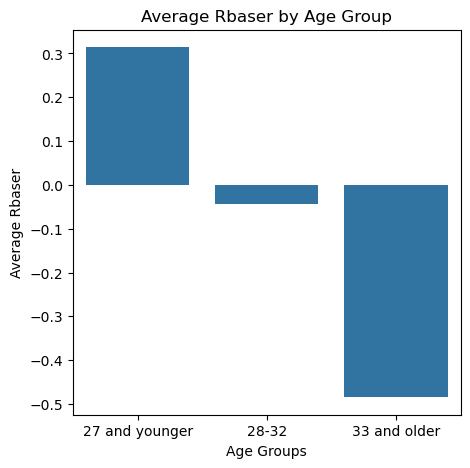

In [38]:
# Calculating the average Rbaser and grouping them by age

age_Rbaser_avg = final_combined.groupby(['Age'])['Rbaser'].mean().reset_index()

# Creating a bar plot with seaborn to show the average Rbaser by age

plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='Rbaser', data=age_Rbaser_avg)
plt.title('Average Rbaser by Age')
plt.xlabel('Age of Players')
plt.ylabel('Average Rbaser')
plt.show()

# Calculating the average Rbaser and grouping them by the age groups created previously

age_Rbaser_avg = final_combined.groupby(['Age_Groups'], observed=True)['Rbaser'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average Rbaser by age group

plt.figure(figsize=(5, 5))
sns.barplot(x='Age_Groups', y='Rbaser', data=age_Rbaser_avg)
plt.title('Average Rbaser by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Rbaser')
plt.show()

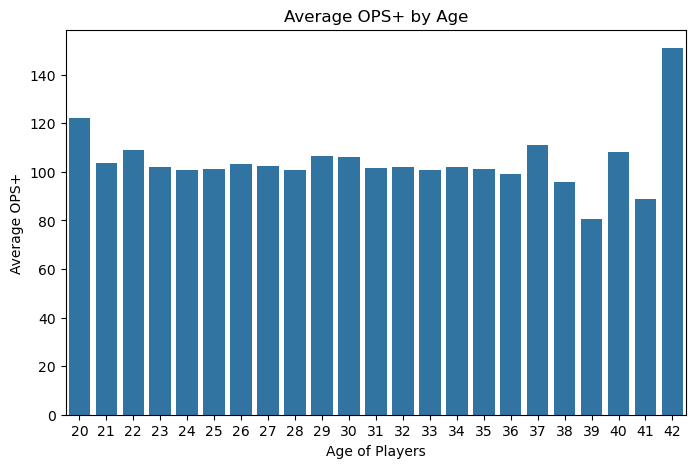

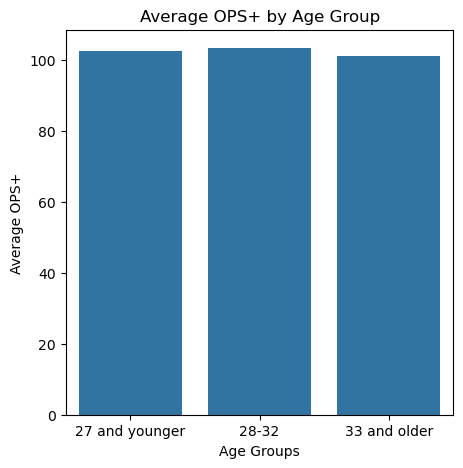

In [40]:
# Calculating the average OPS+ and grouping them by age

age_OPS_avg = final_combined.groupby(['Age'])['OPS+'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average OPS+ by age

plt.figure(figsize=(8, 5))
sns.barplot(x='Age', y='OPS+', data=age_OPS_avg)
plt.title('Average OPS+ by Age')
plt.xlabel('Age of Players')
plt.ylabel('Average OPS+')
plt.show()

# Calculating the average OPS+ and grouping them by the age groups created previously

age_OPS_avg = final_combined.groupby(['Age_Groups'], observed=True)['OPS+'].mean().reset_index() 

# Creating a bar plot with seaborn to show the average OPS+ by age group

plt.figure(figsize=(5, 5))
sns.barplot(x='Age_Groups', y='OPS+', data=age_OPS_avg)
plt.title('Average OPS+ by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average OPS+')
plt.show()

The only graphs that show serious differences is the Rbaser. The 27 and younger group has a considerable advantage over the other two groups when it comes to baserunning. This can be explained as players who are more youthful tend to be faster and have fresher legs. 

There are no other major differences in the averages accross groups. I will next look at where the consistentcy lies with each group using a box plot. I want to see if there are many outliers.

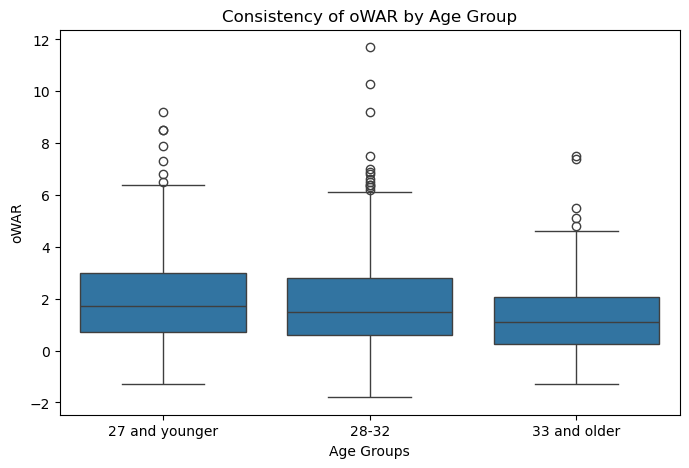

In [43]:
# Crating a boxplot looking at oWAR
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(8, 5))
sns.boxplot(x='Age_Groups', y='oWAR', data=final_combined)
plt.title('Consistency of oWAR by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('oWAR')
plt.show()

There seems to be a decent amount of outliers on the upper end so I will now look at the number of elite seasons broken down by the age groups.

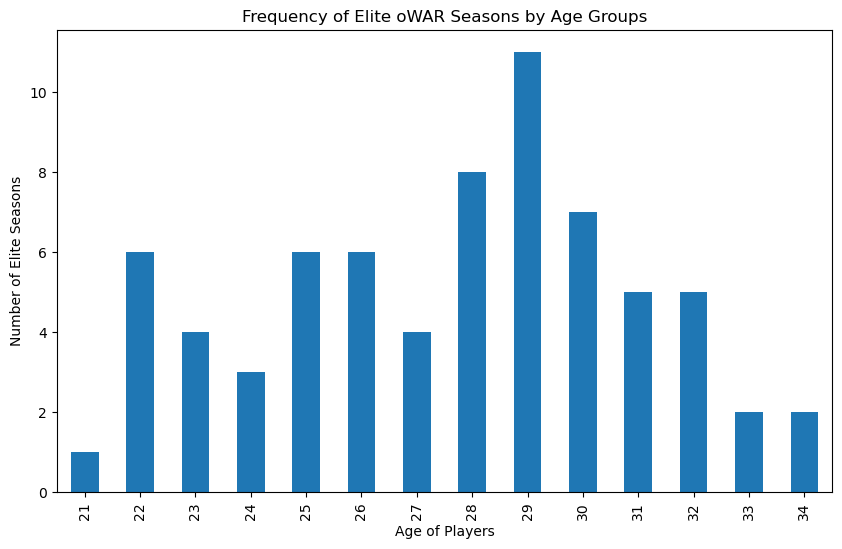

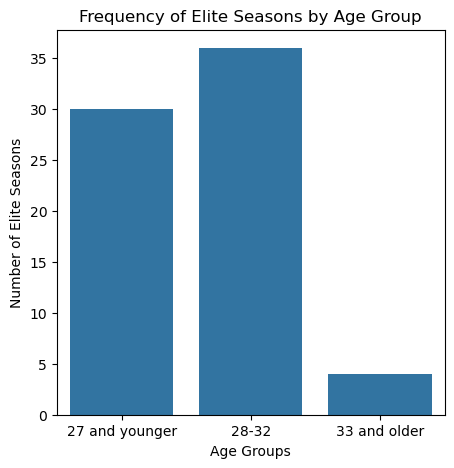

In [46]:
# Creating a new data frame to only look at the elite oWAR seasons

elite_seasons = final_combined[final_combined['oWAR'] > 5]

# Counting the number of elite oWAR seasons by age

elite_counts = elite_seasons['Age'].value_counts().sort_index()

# Creating a bar plot to view the number of elite oWAR seasons by age

plt.figure(figsize=(10, 6))
elite_counts.plot(kind='bar')
plt.title('Frequency of Elite oWAR Seasons by Age Groups')
plt.xlabel('Age of Players')
plt.ylabel('Number of Elite Seasons')
plt.show()

# Counting the number of elite oWAR seasons by age group

elite_counts_by_group = elite_seasons['Age_Groups'].value_counts(sort=False).reset_index()

elite_counts_by_group.columns = ['Age_Groups', 'Elite oWAR Season Count']

# Creating a bar plot to view the number of elite oWAR seasons by age group

plt.figure(figsize=(5, 5))
sns.barplot(x='Age_Groups', y='Elite oWAR Season Count', data=elite_counts_by_group)
plt.title('Frequency of Elite Seasons by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Elite Seasons')
plt.show()

While the overall statistic do not favor any particular age group, over the past four seasons, the 28-32 year old group has had the most number of elite seasons.

The second hypothesis I  will explore is that strike out% does not correlate to hitting performance.

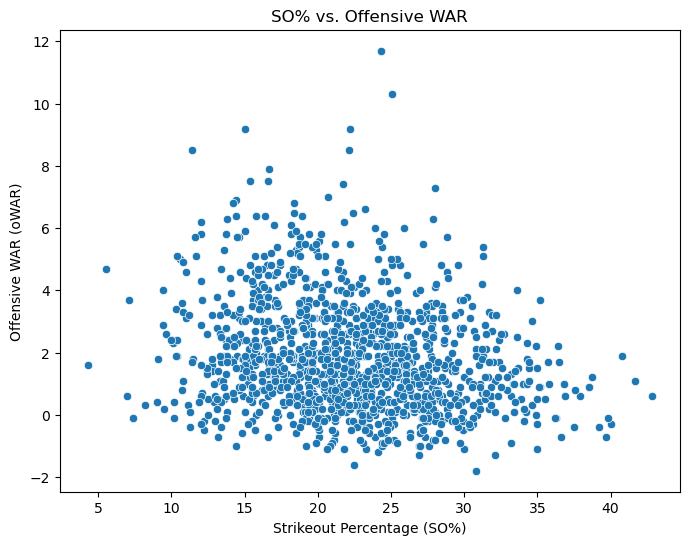

In [50]:
# Creating a Scatterplot to compare SO% and oWAR
# https://www.w3schools.com/python/python_ml_scatterplot.asp  
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

plt.figure(figsize=(8, 6))
sns.scatterplot(x='SO%', y='oWAR', data=final_combined)
plt.title('SO% vs. Offensive WAR')
plt.xlabel('Strikeout Percentage (SO%)')
plt.ylabel('Offensive WAR (oWAR)')
plt.show()

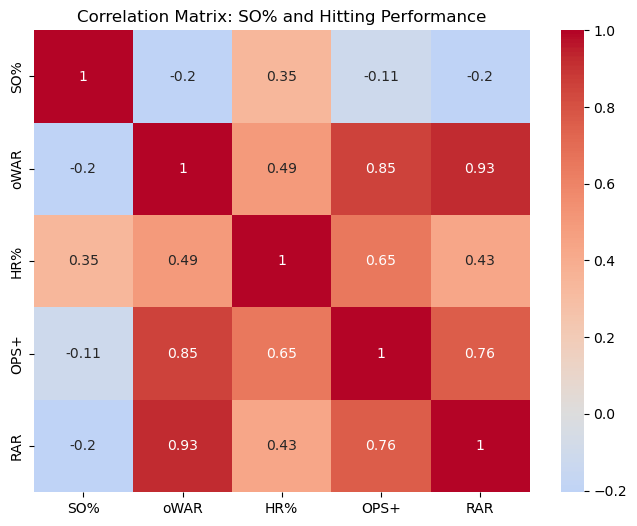

In [52]:
# Creating a heat map to see the correlations between SO%, oWAR, HR%, OPS+, and RAR
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr_matrix = final_combined[['SO%', 'oWAR', 'HR%', 'OPS+', 'RAR']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  center=0)
plt.title('Correlation Matrix: SO% and Hitting Performance')
plt.show()

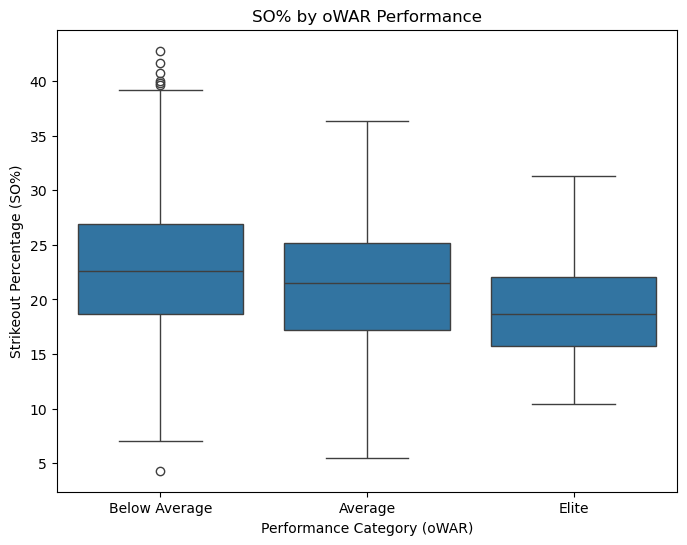

In [54]:
# Creating bins and labels to group oWAR

bins = [-float('inf'), 2, 5, float('inf')]
labels=['Below Average', 'Average', 'Elite']

# Grouping the number of players in each group of oWAR performance

final_combined['Performance'] = pd.cut(final_combined['oWAR'], bins=bins, labels=labels)

# Creating a box plot to view the breakdown of players in each oWAR group by SO%

plt.figure(figsize=(8, 6))
sns.boxplot(x='Performance', y='SO%', data=final_combined)
plt.title('SO% by oWAR Performance')
plt.xlabel('Performance Category (oWAR)')
plt.ylabel('Strikeout Percentage (SO%)')
plt.show()

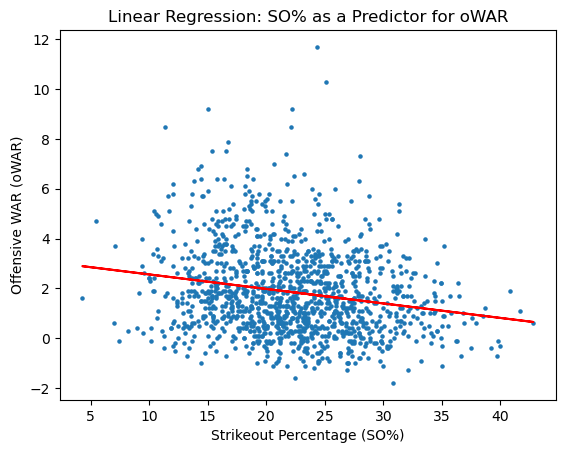

Correlation Coefficient (r): -0.20112645411070942


In [59]:
# Importing stats from scipy to add a line of regression to the previous scatter plot
# https://www.w3schools.com/python/python_ml_linear_regression.asp

from scipy import stats

x = final_combined['SO%']
y = final_combined['oWAR']

# Creating my line of regression

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

# Creating the scatter plot from earlier with the line of regression

plt.scatter(x, y,  s = 5)
plt.plot(x, mymodel, color="red", label="Regression Line")
plt.title('Linear Regression: SO% as a Predictor for oWAR')
plt.xlabel('Strikeout Percentage (SO%)')
plt.ylabel('Offensive WAR (oWAR)')
plt.show()

print("Correlation Coefficient (r):", r)

There is nearly no correlation between SO% and any of the offensive stats I have examined in this project.

Data Links:

https://www.baseball-reference.com/leagues/majors/2024-standard-batting.shtml
https://www.baseball-reference.com/leagues/majors/2024-advanced-batting.shtml
https://www.baseball-reference.com/leagues/majors/2024-value-batting.shtml
https://www.baseball-reference.com/leagues/majors/2023-standard-batting.shtml
https://www.baseball-reference.com/leagues/majors/2023-advanced-batting.shtml
https://www.baseball-reference.com/leagues/majors/2023-value-batting.shtml
https://www.baseball-reference.com/leagues/majors/2022-standard-batting.shtml
https://www.baseball-reference.com/leagues/majors/2022-advanced-batting.shtml
https://www.baseball-reference.com/leagues/majors/2022-value-batting.shtml
https://www.baseball-reference.com/leagues/majors/2021-standard-batting.shtml
https://www.baseball-reference.com/leagues/majors/2021-advanced-batting.shtml
https://www.baseball-reference.com/leagues/majors/2021-value-batting.shtml